In [3]:
import numpy as np
import matplotlib.pyplot as plt
import logging

%matplotlib inline
logging.getLogger('matplotlib').setLevel(logging.DEBUG)
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amsfonts}\usepackage{bm}'

plt.rcParams['font.size'] = 14  # Set the default font size
plt.rcParams['xtick.labelsize'] = 24  # X tick font size

# Load data from files specified in series_configs
error_stats_path_template = './output/{}_num_error_patterns={}_rho={}_{}.npy'


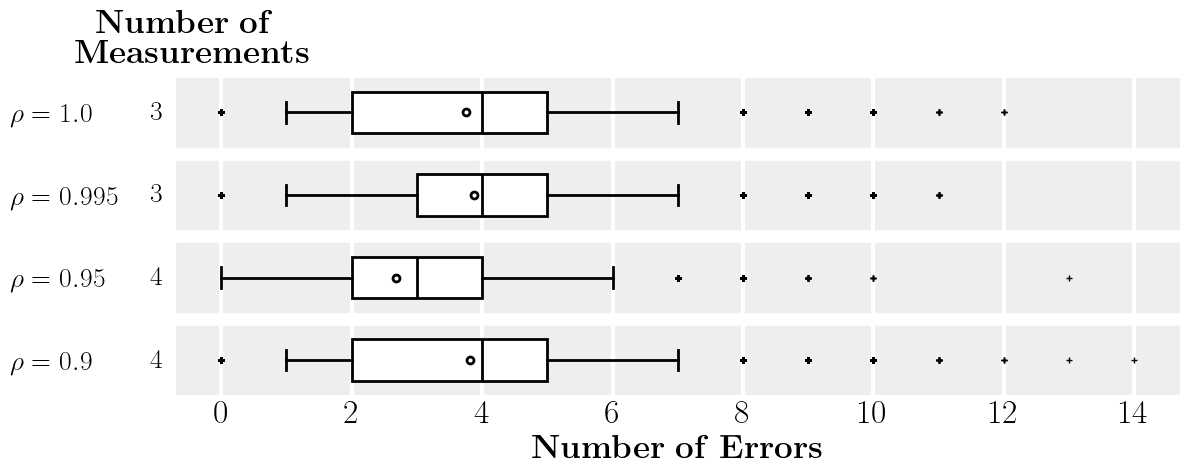

In [7]:
# MV part - hqc128
series_configs = [
    {'mvORfd': 'mv', 'num_error_patterns': 4, 'rho': '0.9', 'scheme': 'hqc128', 'label': r'$\rho=0.9$'},
    {'mvORfd': 'mv', 'num_error_patterns': 4, 'rho': '0.95', 'scheme': 'hqc128', 'label': r'$\rho=0.95$'},
    {'mvORfd': 'mv', 'num_error_patterns': 3, 'rho': '0.995', 'scheme': 'hqc128', 'label': r'$\rho=0.995$'},
    {'mvORfd': 'mv', 'num_error_patterns': 3, 'rho': '1.0', 'scheme': 'hqc128', 'label': r'$\rho=1.0$'}
]

# Initialize lists to store data and positions for plotting
all_data = []
all_positions = []
all_labels = []
num_measurements = [] 

# Assign positions dynamically (adjust this spacing)
start_position = 1
spacing = 1.2  # Reduce spacing further to make gaps narrower
for i, config in enumerate(series_configs):
    file_path = error_stats_path_template.format(config['mvORfd'], config['num_error_patterns'], config['rho'], config['scheme'])
    try:
        data = np.load(file_path)
        all_data.append(data)
        all_positions.append(start_position)
        all_labels.append(config['label'])
        num_measurements.append(r'${}$'.format(config['num_error_patterns']))
        start_position += spacing  # Increment position for the next rho group
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Boxplot customization properties
box_properties = {
    'whis': [5, 95],  # Whiskers to represent 5th and 95th percentiles
    'showmeans': True,  # Show mean
    'meanprops': {'marker': 'o', 'markeredgecolor': 'black', 'markerfacecolor': 'white', 'markeredgewidth': 2, 'markersize': 5},
    'boxprops': {'color': 'black', 'linewidth': 2, 'facecolor': 'white'},
    'medianprops': {'color': 'black', 'linewidth': 2},
    'whiskerprops': {'color': 'black', 'linewidth': 2},
    'flierprops': {'marker': '+', 'markersize': 5, 'markeredgecolor': 'black'},
    'widths': 0.6,
    'capprops': {'color': 'black', 'linewidth': 2},
    'patch_artist': True
}

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the data using matplotlib's boxplot
for data, pos in zip(all_data, all_positions):
    ax.boxplot(
        data,
        positions=[pos],  # Position the box plot dynamically
        vert=False,  # Horizontal box plot
        **box_properties
    )

# Add shaded background areas for each rho group
for pos in all_positions:
    ax.axhspan(pos - 0.5, pos + 0.5, color='#eeeeee', alpha=1)

# Remove the border of the plot area
for spine in ax.spines.values():
    spine.set_visible(False)

# Set grid; remove horizontal, set vertical grid to white
ax.grid(False)
ax.grid(True, which='major', axis='x', color='white', linestyle='-', linewidth=3)

# Hide the x,y-axis ticks
ax.tick_params(axis='y', which='both', length=0) 
ax.tick_params(axis='x', which='both', length=0) 

# Properly set the y-ticks and labels
ax.set_yticks(all_positions)  # Position ticks correctly
ax.set_yticklabels(all_labels, fontsize=20, ha='left')  # Add rho labels to the left
for tick in ax.get_yticklabels():
    tick.set_horizontalalignment('left')  # Align the labels to the left
    tick.set_x(-0.16)  # Adjust the value to move the labels leftward
# Set x-axis and y-axis labels
plt.xlabel(r'$\mathbf{Number\ of\ Errors}$', fontsize=24)


# Add number of measurements (num error patterns) on the left
ax2 = ax.twinx()  # Create a secondary y-axis

# Hide unnecessary spines
ax2.spines['top'].set_visible(False)  # Hide the top spine
ax2.spines['bottom'].set_visible(False)  # Hide the bottom spine
ax2.spines['right'].set_visible(False)  # Hide the right spine
ax2.spines['left'].set_visible(False)  # Hide the left spine for cleanliness

# Set the secondary y-axis tick positions and labels
ax2.set_yticks(all_positions)  # Use the same tick positions as the primary y-axis
ax2.set_yticklabels(num_measurements, fontsize=20, ha='left')  # Add number of measurements as labels

# Align and adjust the position of the labels
for tick in ax2.get_yticklabels():
    tick.set_horizontalalignment('left')  # Align labels to the left
    tick.set_x(-0.03)  # Adjust the value to move the labels leftward
    tick.set_verticalalignment('center')  # Ensure vertical alignment matches the primary axis ticks

# Ensure the secondary y-axis matches the primary y-axis limits
ax2.set_ylim(ax.get_ylim())  # Synchronize y-limits with the primary axis

# Remove tick marks (spikes) on the secondary y-axis
ax2.tick_params(axis='y', which='both', length=0)




plt.text(-0.1, 1.05, r'$\mathbf{Number\ of}$ \\[4pt] $\mathbf{Measurements}$', transform=plt.gca().transAxes, ha='left', va='bottom', fontsize=24)



# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('./plots/mv_hqc128.pdf', format='pdf', bbox_inches='tight')
plt.show()


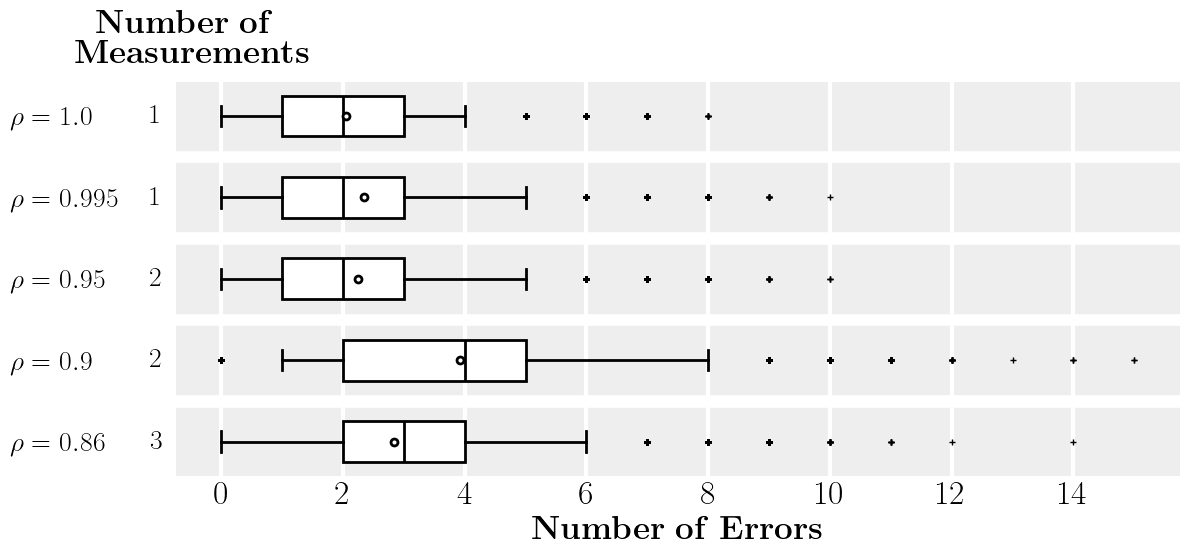

In [11]:
# FD (Full Decryption) Style - hqc128
series_configs = [
    {'mvORfd': 'fd', 'num_error_patterns': 3, 'rho': '0.86', 'scheme': 'hqc128', 'label': r'$\rho=0.86$'},
    {'mvORfd': 'fd', 'num_error_patterns': 2, 'rho': '0.9', 'scheme': 'hqc128', 'label': r'$\rho=0.9$'},
    {'mvORfd': 'fd', 'num_error_patterns': 2, 'rho': '0.95', 'scheme': 'hqc128', 'label': r'$\rho=0.95$'},
    {'mvORfd': 'fd', 'num_error_patterns': 1, 'rho': '0.995', 'scheme': 'hqc128', 'label': r'$\rho=0.995$'},
    {'mvORfd': 'fd', 'num_error_patterns': 1, 'rho': '1.0', 'scheme': 'hqc128', 'label': r'$\rho=1.0$'}
]

# Initialize lists to store data and positions for plotting
all_data = []
all_positions = []
all_labels = []
num_measurements = [] 

# Assign positions dynamically (adjust this spacing)
start_position = 1
spacing = 1.2  # Reduce spacing further to make gaps narrower
for i, config in enumerate(series_configs):
    file_path = error_stats_path_template.format(config['mvORfd'], config['num_error_patterns'], config['rho'], config['scheme'])
    try:
        data = np.load(file_path)
        all_data.append(data)
        all_positions.append(start_position)
        all_labels.append(config['label'])
        num_measurements.append(r'${}$'.format(config['num_error_patterns']))
        start_position += spacing  # Increment position for the next rho group
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Boxplot customization properties
box_properties = {
    'whis': [5, 95],  # Whiskers to represent 5th and 95th percentiles
    'showmeans': True,  # Show mean
    'meanprops': {'marker': 'o', 'markeredgecolor': 'black', 'markerfacecolor': 'white', 'markeredgewidth': 2, 'markersize': 5},
    'boxprops': {'color': 'black', 'linewidth': 2, 'facecolor': 'white'},
    'medianprops': {'color': 'black', 'linewidth': 2},
    'whiskerprops': {'color': 'black', 'linewidth': 2},
    'flierprops': {'marker': '+', 'markersize': 5, 'markeredgecolor': 'black'},
    'widths': 0.6,
    'capprops': {'color': 'black', 'linewidth': 2},
    'patch_artist': True
}

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 5.8))

# Plot the data using matplotlib's boxplot
for data, pos in zip(all_data, all_positions):
    ax.boxplot(
        data,
        positions=[pos],  # Position the box plot dynamically
        vert=False,  # Horizontal box plot
        **box_properties
    )

# Add shaded background areas for each rho group
for pos in all_positions:
    ax.axhspan(pos - 0.5, pos + 0.5, color='#eeeeee', alpha=1)

# Remove the border of the plot area
for spine in ax.spines.values():
    spine.set_visible(False)

# Set grid; remove horizontal, set vertical grid to white
ax.grid(False)
ax.grid(True, which='major', axis='x', color='white', linestyle='-', linewidth=3)

# Hide the x,y-axis ticks
ax.tick_params(axis='y', which='both', length=0) 
ax.tick_params(axis='x', which='both', length=0) 

# Properly set the y-ticks and labels
ax.set_yticks(all_positions)  # Position ticks correctly
ax.set_yticklabels(all_labels, fontsize=20, ha='left')  # Add rho labels to the left
for tick in ax.get_yticklabels():
    tick.set_horizontalalignment('left')  # Align the labels to the left
    tick.set_x(-0.16)  # Adjust the value to move the labels leftward
# Set x-axis and y-axis labels
plt.xlabel(r'$\mathbf{Number\ of\ Errors}$', fontsize=24)


# Add number of measurements (num error patterns) on the left
ax2 = ax.twinx()  # Create a secondary y-axis

# Hide unnecessary spines
ax2.spines['top'].set_visible(False)  # Hide the top spine
ax2.spines['bottom'].set_visible(False)  # Hide the bottom spine
ax2.spines['right'].set_visible(False)  # Hide the right spine
ax2.spines['left'].set_visible(False)  # Hide the left spine for cleanliness

# Set the secondary y-axis tick positions and labels
ax2.set_yticks(all_positions)  # Use the same tick positions as the primary y-axis
ax2.set_yticklabels(num_measurements, fontsize=20, ha='left')  # Add number of measurements as labels

# Align and adjust the position of the labels
for tick in ax2.get_yticklabels():
    tick.set_horizontalalignment('left')  # Align labels to the left
    tick.set_x(-0.03)  # Adjust the value to move the labels leftward
    tick.set_verticalalignment('center')  # Ensure vertical alignment matches the primary axis ticks

# Ensure the secondary y-axis matches the primary y-axis limits
ax2.set_ylim(ax.get_ylim())  # Synchronize y-limits with the primary axis

# Remove tick marks (spikes) on the secondary y-axis
ax2.tick_params(axis='y', which='both', length=0)




plt.text(-0.1, 1.05, r'$\mathbf{Number\ of}$ \\[4pt] $\mathbf{Measurements}$', transform=plt.gca().transAxes, ha='left', va='bottom', fontsize=24)



# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('./plots/fd_hqc128.pdf', format='pdf', bbox_inches='tight')

plt.show()


In [10]:
hqc192_fd = np.load(error_stats_path_template.format('fd',2,'1.0','hqc192'))

hqc192_fd.mean()

4.0046

In [11]:
hqc256_fd = np.load(error_stats_path_template.format('fd',2,'1.0','hqc256'))

hqc256_fd.mean()

3.2656